# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [71]:
X_train = pd.read_csv(r"C:\Users\earap\Documents\EBAC\DataScienceExcercises\Módulo 17 - Árvores II\ex026\UCI HAR Dataset\train\X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv(r"C:\Users\earap\Documents\EBAC\DataScienceExcercises\Módulo 17 - Árvores II\ex026\UCI HAR Dataset\train\y_train.txt", header=None).squeeze("columns")
X_test = pd.read_csv(r"C:\Users\earap\Documents\EBAC\DataScienceExcercises\Módulo 17 - Árvores II\ex026\UCI HAR Dataset\test\X_test.txt", delim_whitespace=True, header=None)
y_test = pd.read_csv(r"C:\Users\earap\Documents\EBAC\DataScienceExcercises\Módulo 17 - Árvores II\ex026\UCI HAR Dataset\test\y_test.txt", header=None).squeeze("columns")

C:\Users\earap\AppData\Local\Temp\ipykernel_4788\1583044210.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(r"C:\Users\earap\Documents\EBAC\DataScienceExcercises\Módulo 17 - Árvores II\ex026\UCI HAR Dataset\train\X_train.txt", delim_whitespace=True, header=None)
C:\Users\earap\AppData\Local\Temp\ipykernel_4788\1583044210.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(r"C:\Users\earap\Documents\EBAC\DataScienceExcercises\Módulo 17 - Árvores II\ex026\UCI HAR Dataset\test\X_test.txt", delim_whitespace=True, header=None)


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [72]:
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [73]:
print("Tamanho da base de Treino final:", X_train_final.shape)
print("Tamanho da base de Validação:", X_val.shape)
print("Tamanho da base de Teste:", X_test.shape)

Tamanho da base de Treino final: (5514, 561)
Tamanho da base de Validação: (1838, 561)
Tamanho da base de Teste: (2947, 561)


In [74]:
X_train_final.to_csv("X_train_final.csv")
X_val.to_csv("X_val.csv")
y_train_final.to_csv("y_train_final.csv", index=False)
y_val.to_csv("y_val.csv", index=False)

In [75]:
print("\nBase de Treino Final (X_train_final):")
display(X_train_final.head())


Base de Treino Final (X_train_final):


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
6593,0.217295,-0.028434,-0.035783,0.112690,0.385710,-0.278131,0.073424,0.245334,-0.287065,0.501013,...,0.032014,-0.294236,-0.712034,0.375335,0.862712,-0.856674,-0.127017,-0.697847,0.257591,0.156072
3519,0.294986,-0.009296,-0.131391,-0.993909,-0.986564,-0.979937,-0.993960,-0.987312,-0.978540,-0.933301,...,0.233407,-0.245448,-0.570007,0.045285,0.206134,0.480290,-0.536318,0.404301,-0.540630,-0.439175
4376,0.277687,-0.021567,-0.119773,-0.997574,-0.971204,-0.962630,-0.997970,-0.973411,-0.961315,-0.940367,...,-0.155265,0.004761,-0.466258,-0.017931,0.011397,-0.049740,-0.832645,-0.815056,0.217049,-0.030873
4294,0.284126,-0.016949,-0.110375,-0.939142,-0.975456,-0.961415,-0.937114,-0.971846,-0.954680,-0.897753,...,0.280670,-0.034942,-0.369696,0.104778,0.411780,-0.484426,-0.475188,0.413741,-0.362547,-0.627093
29,0.279998,-0.019484,-0.105724,-0.992818,-0.940350,-0.981493,-0.993092,-0.936927,-0.980669,-0.935389,...,0.755593,-0.768623,-0.928548,-0.228688,-0.097215,0.024192,0.006329,-0.579367,-0.021567,-0.257530


In [50]:
print("\nBase de Validação (X_val):")
display(X_val.head())


Base de Validação (X_val):


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
4525,0.283203,-0.047024,-0.168986,0.384949,0.176898,-0.310332,0.381757,0.122611,-0.332984,0.465563,...,0.454181,-0.730593,-0.932568,-0.034924,0.558036,0.258975,-0.854858,-0.784330,0.222960,-0.066506
1446,0.256904,-0.036623,-0.133856,0.201409,-0.154142,0.344183,0.092771,-0.182114,0.291899,0.586004,...,0.190745,-0.032958,-0.338095,0.017986,-0.475545,0.942947,-0.567147,-0.665156,0.178975,0.243362
5995,0.291316,-0.001065,-0.072461,-0.336609,-0.279162,-0.303323,-0.381421,-0.253026,-0.337381,0.074430,...,0.299767,-0.351997,-0.698254,-0.044663,-0.551806,-0.680774,0.161405,-0.857202,0.192929,0.046716
4222,0.276116,-0.010909,-0.102886,-0.992196,-0.982169,-0.981127,-0.992838,-0.981366,-0.979864,-0.931924,...,0.335848,-0.623358,-0.906098,-0.177275,-0.309304,0.176515,-0.143818,-0.625215,-0.106678,-0.147469
6754,0.256382,0.000428,-0.113664,0.075014,0.046502,-0.369482,-0.024794,-0.085337,-0.385018,0.562230,...,-0.125979,0.020630,-0.316113,0.347143,0.590475,0.831084,0.465453,-0.860617,0.150598,-0.067109


In [51]:
print("\nBase de Teste (X_test):")
display(X_test.head())


Base de Teste (X_test):


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [76]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train_final, y_train_final)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [77]:
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X_train_final.columns,
    "Importance": importances
})

In [78]:
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

In [79]:
print("Top 10 variáveis mais importantes:")
display(feature_importance_df.head(10))

Top 10 variáveis mais importantes:


,Feature,Importance
52,52,0.285303
389,389,0.254091
41,41,0.164608
214,214,0.140142
69,69,0.122278
159,159,0.016485
56,56,0.011498
426,426,0.005594
381,381,0.000000
380,380,0.000000


In [80]:
top_3_features = feature_importance_df.head(3)["Feature"].tolist()
print("\nAs 3 variáveis mais importantes são:", top_3_features)


As 3 variáveis mais importantes são: [52, 389, 41]


In [81]:
X_train_top3 = X_train_final[top_3_features]
X_val_top3 = X_val[top_3_features]
X_test_top3 = X_test[top_3_features]

In [82]:
X_train_top3.to_csv("X_train_top3.csv")
X_val_top3.to_csv("X_val_top3.csv")
X_test_top3.to_csv("X_test_top3.csv")

In [59]:
print("\nBase de Treino com as 3 variáveis mais importantes (X_train_top3):")
display(X_train_top3.head())


Base de Treino com as 3 variáveis mais importantes (X_train_top3):


,52,389,559
0,0.977436,-0.999982,0.179941
1,0.984520,-0.999987,0.180289
2,0.986770,-0.999963,0.180637
3,0.986821,-0.999978,0.181935
4,0.987434,-0.999988,0.185151


In [60]:
print("\nBase de Teste com as 3 variáveis mais importantes (X_test_top3):")
display(X_test_top3.head())


Base de Teste com as 3 variáveis mais importantes (X_test_top3):


,52,389,559
0,0.944461,-0.998040,0.276801
1,0.944461,-0.999641,0.281343
2,0.948704,-0.999954,0.280083
3,0.947309,-0.999949,0.284114
4,0.946221,-0.999955,0.290722


In [83]:
print("\nBase de Teste com as 3 variáveis mais importantes (X_val_top3):")
display(X_val_top3.head())


Base de Teste com as 3 variáveis mais importantes (X_val_top3):


,52,389,41
4525,0.910931,-0.500135,-0.198698
1446,0.886878,-0.318242,-0.137829
5995,0.983467,-0.780224,-0.159944
4222,0.879176,-0.999977,0.272900
6754,0.940240,-0.605146,-0.096393


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [84]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train_top3, y_train_final)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [85]:
path = clf.cost_complexity_pruning_path(X_train_top3, y_train_final)
ccp_alphas = path.ccp_alphas
ccp_alphas = np.unique(ccp_alphas[ccp_alphas >= 0])

In [63]:
X_test_top3 = pd.read_csv("X_test_top3.csv", index_col=[0, 1])
y_test = pd.read_csv(r"C:\Users\earap\Documents\EBAC\DataScienceExcercises\Módulo 17 - Árvores II\ex026\UCI HAR Dataset\test\y_test.txt", header=None).squeeze("columns")

In [86]:
train_scores = []
val_scores = []

for alpha in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    tree.fit(X_train_top3, y_train_final)
    
    # Calcular acurácia na base de treino e validação
    train_scores.append(accuracy_score(y_train_final, tree.predict(X_train_top3)))
    val_scores.append(accuracy_score(y_val, tree.predict(X_val_top3)))  # Usar X_val_top3


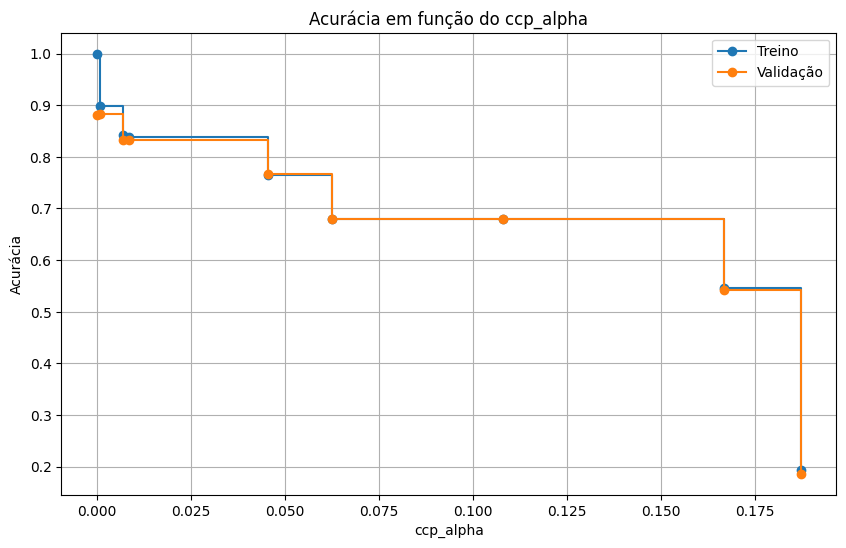

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Treino', drawstyle="steps-post")
plt.plot(ccp_alphas, val_scores, marker='o', label='Validação', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Acurácia")
plt.title("Acurácia em função do ccp_alpha")
plt.legend()
plt.grid()
plt.show()

In [88]:
best_alpha = ccp_alphas[np.argmax(val_scores)]
print(f"Melhor ccp_alpha: {best_alpha}")

Melhor ccp_alpha: 0.0010209725265303456


In [89]:
best_tree = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
best_tree.fit(X_train_top3, y_train_final)

DecisionTreeClassifier(ccp_alpha=0.0010209725265303456, random_state=42)

In [90]:
test_accuracy = accuracy_score(y_test, best_tree.predict(X_test_top3))
print(f"Acurácia na base de teste: {test_accuracy:.4f}")

Acurácia na base de teste: 0.6932


In [91]:
feature_importance_df = pd.DataFrame({
    "Feature": X_train_top3.columns,
    "Importance": best_tree.feature_importances_
}).sort_values(by="Importance", ascending=False)

In [92]:
print("\nImportância das variáveis na árvore final:")
display(feature_importance_df)


Importância das variáveis na árvore final:


,Feature,Importance
0,52,0.385199
1,389,0.366966
2,41,0.247835


### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [93]:
test_accuracy = accuracy_score(y_test, best_tree.predict(X_test_top3))
print(f"Acurácia na base de teste: {test_accuracy:.4f}")

Acurácia na base de teste: 0.6932


In [98]:
cm = confusion_matrix(y_test, best_tree.predict(X_test_top3))

In [99]:
cm = confusion_matrix(y_test, best_tree.predict(X_test_top3))

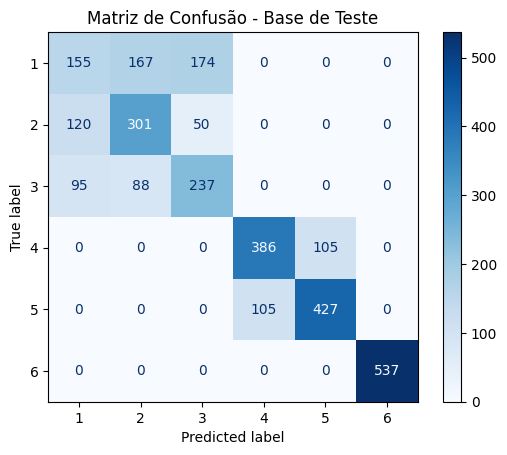

In [100]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_tree.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Base de Teste")
plt.show()

In [101]:
feature_importance_df = pd.DataFrame({
    "Feature": X_train_top3.columns,
    "Importance": best_tree.feature_importances_
}).sort_values(by="Importance", ascending=False)

In [102]:
print("\nImportância das variáveis na árvore final:")
display(feature_importance_df)


Importância das variáveis na árvore final:


,Feature,Importance
0,52,0.385199
1,389,0.366966
2,41,0.247835
